In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lifelines -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.3 MB/s eta 0:00:00


In [3]:
TEST_PATH = "/content/drive/MyDrive/1:1_Shriya_Wagholikar/Datasets/experiment_1/exp1_selectKBest_vif_test.csv"

In [4]:
import pandas as pd
test_data = pd.read_csv(TEST_PATH)
test_data.head()

,ASB13,C6orf58,TMEM248,DNAJB12,EN1,FAM114A1,FAM46A,GALNT2,GGCX,GNG12,...,SKI,TCEAL1,TCEAL2,TEF,TMEM194B,TNFRSF11B,TUBGCP2,WISP1,Disease Free (Months),DFS_STATUS_ENCODED
0,-0.1050,2.1691,-0.6761,0.1240,-0.9673,-0.9148,-1.0645,-0.3780,-1.5448,-0.2980,...,-0.4457,0.7045,0.4209,0.6173,-1.0707,-0.5709,1.3146,-0.2024,119.48,1.0
1,-0.5950,-0.2513,-0.2209,1.2554,-0.9815,0.2250,0.7169,0.9993,0.4485,0.2041,...,1.3895,0.1068,0.8163,-0.1429,0.6752,0.0074,0.8986,-0.3668,95.86,0.0
2,0.2187,-1.9452,-0.3263,0.3733,0.2466,0.3526,1.4144,0.3906,1.2149,0.4633,...,0.6493,-0.0159,-0.2995,-1.4228,-0.4799,1.5829,0.3286,-0.5494,16.79,1.0
3,0.5543,1.1511,-0.6104,-0.1870,-0.7498,-0.0701,-1.5171,-1.0341,-1.0295,0.0027,...,-0.0380,0.4263,0.0930,0.9072,-0.8850,-0.2086,0.3464,-0.2734,14.55,0.0
4,0.3029,0.6479,-0.7701,0.5613,-0.5275,-0.1509,0.2339,-0.4920,0.0690,-1.3476,...,-0.7415,-0.4040,0.1320,0.7651,-0.3531,-0.7662,0.7937,0.8867,31.18,0.0


In [5]:
#have loaded the best model from step 3
import pickle
MODEL_PATH = "/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_1/best_model_exp1"
with open(MODEL_PATH, 'rb') as f:
    model = pickle.load(f)

In [6]:
#get survival function predictions for test data
# Predict survival functions for the test data
survival_functions = model.predict_survival_function(test_data)

In [7]:
THRESHOLD = 0.70

In [8]:
predictions = []
time_period = []
for index, survival_function in survival_functions.items():
    # Find the first time point where the survival probability drops below the threshold
    time_point = survival_function[survival_function < THRESHOLD].index[0] if any(survival_function < THRESHOLD) else None
    # Classify as recurrence (1) if such a time point exists, otherwise classify as no recurrence (0)
    prediction = "Re-occurence" if time_point is not None else "No-occurence"
    predictions.append(prediction)
    time_period.append(time_point)
# make copy of the original dataframe
pred_test_df = test_data.copy()
# attach the predictions
column_name = "Re-occurence_{}%".format(int(100 - (0.70 * 100)))
column_time_name = "Re-occurence-time"
pred_test_df[column_name] = predictions
pred_test_df[column_time_name] = time_period
pred_test_df.head()

,ASB13,C6orf58,TMEM248,DNAJB12,EN1,FAM114A1,FAM46A,GALNT2,GGCX,GNG12,...,TCEAL2,TEF,TMEM194B,TNFRSF11B,TUBGCP2,WISP1,Disease Free (Months),DFS_STATUS_ENCODED,Re-occurence_30%,Re-occurence-time
0,-0.1050,2.1691,-0.6761,0.1240,-0.9673,-0.9148,-1.0645,-0.3780,-1.5448,-0.2980,...,0.4209,0.6173,-1.0707,-0.5709,1.3146,-0.2024,119.48,1.0,Re-occurence,100.89
1,-0.5950,-0.2513,-0.2209,1.2554,-0.9815,0.2250,0.7169,0.9993,0.4485,0.2041,...,0.8163,-0.1429,0.6752,0.0074,0.8986,-0.3668,95.86,0.0,Re-occurence,28.29
2,0.2187,-1.9452,-0.3263,0.3733,0.2466,0.3526,1.4144,0.3906,1.2149,0.4633,...,-0.2995,-1.4228,-0.4799,1.5829,0.3286,-0.5494,16.79,1.0,Re-occurence,12.02
3,0.5543,1.1511,-0.6104,-0.1870,-0.7498,-0.0701,-1.5171,-1.0341,-1.0295,0.0027,...,0.0930,0.9072,-0.8850,-0.2086,0.3464,-0.2734,14.55,0.0,Re-occurence,91.62
4,0.3029,0.6479,-0.7701,0.5613,-0.5275,-0.1509,0.2339,-0.4920,0.0690,-1.3476,...,0.1320,0.7651,-0.3531,-0.7662,0.7937,0.8867,31.18,0.0,Re-occurence,41.95


/tmp/ipython-input-43018544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(pred_test_df, x = column_name, palette="muted")


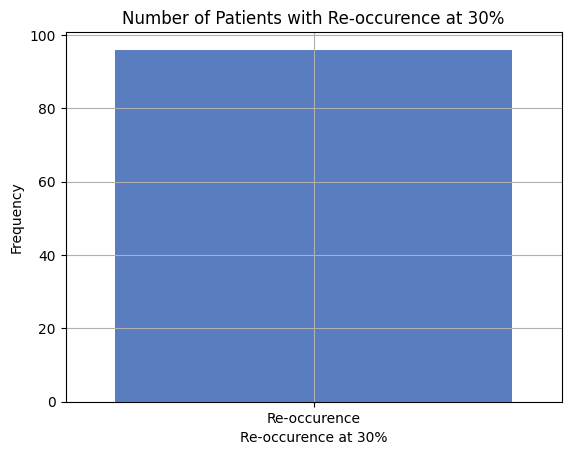

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(figsize = (5,5))
sns.countplot(pred_test_df, x = column_name, palette="muted")
plt.ylabel("Frequency")
plt.xlabel(f"Re-occurence at {int(100 - (0.70 * 100))}%")
plt.title(f"Number of Patients with Re-occurence at {int(100 - (0.70 * 100))}%")
plt.grid(True)
plt.savefig("/content/drive/MyDrive/1:1_Shriya_Wagholikar/Results/experiment_1/30%_reoccurence.png")
plt.show();

In [10]:
# get the error term
pred_test_df["error_time"] = abs(pred_test_df["Disease Free (Months)"] - pred_test_df[column_time_name])
print("Mean Time Error: {}".format(pred_test_df["error_time"].mean()))

Mean Time Error: 22.67114583333333
